In [272]:
pip install opencv-python

In [273]:
import cv2
import imghdr

In [274]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [275]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [330]:
data_dir = 'data'
os.listdir(data_dir)

['active pulmonary tuberculosis',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'Emphysema and bronchiectasis',
 'ILD',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'old  pulmonary tuberculosis, with post infective bronchiectasis',
 'old  pulmonary tuberculosis, with post tubercular bronchiectasis',
 'Old TB',
 'pneumonia and bronchiectasis',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

0 for negative and 1 for positive

In [277]:
image_ext = ['jpeg','jpg','png','bmp']

In [278]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        try:
                
            image_path = os.listdir(os.path.join(data_dir,image_class,image))
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                os.remove(image_path)
        except Exception as e:
            print("no remove")
            
        

no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove


In [279]:
img = cv2.imread(os.path.join('data','active pulmonary tuberculosis','patient 4_0012.jpg'))
img.shape

(376, 631, 3)

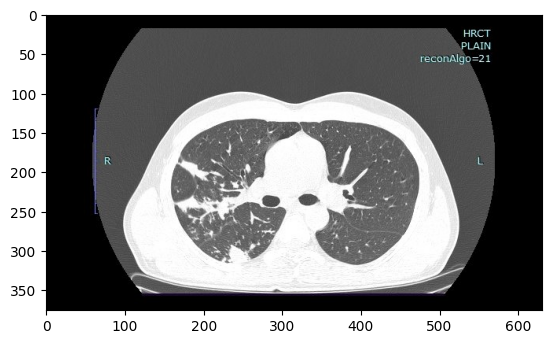

In [280]:
plt.imshow(img)

**Dataset Creation**

In [281]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [331]:
tf.data.Dataset
import numpy as np
data = tf.keras.utils.image_dataset_from_directory("data")

Found 1033 files belonging to 11 classes.


Data as numpy

In [283]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [284]:
batch[0]

array([[[[ 0.        ,  0.        ,  0.        ],
         [ 2.859375  ,  2.859375  ,  2.859375  ],
         [ 3.9570312 ,  3.9570312 ,  3.9570312 ],
         ...,
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.23688507,  0.23688507,  0.23688507],
         [ 4.564171  ,  4.564171  ,  4.564171  ],
         [ 6.178314  ,  6.178314  ,  6.178314  ],
         ...,
         [ 0.        ,  0.        ,  0.        ],
         [ 0.2834854 ,  0.2834854 ,  0.2834854 ],
         [ 1.7513962 ,  1.7513962 ,  1.7513962 ]],

        [[ 1.7468414 ,  1.7468414 ,  1.7468414 ],
         [ 2.4506302 ,  2.4506302 ,  2.4506302 ],
         [ 5.622795  ,  5.622795  ,  5.622795  ],
         ...,
         [ 0.9902344 ,  0.9902344 ,  0.9902344 ],
         [ 0.28515625,  0.28515625,  0.28515625],
         [ 0.25315857,  0.25315857,  0.25315857]],

        ...,

        [[ 0.        ,  0.        ,  0

Labels

In [285]:
batch[1]

array([ 4,  2,  5,  4,  1, 10,  2,  2,  4,  6,  1,  2, 10,  8,  6,  6, 10,
        6,  3,  5,  0, 10,  6,  5,  2,  3,  6, 10,  1,  5,  6,  6])

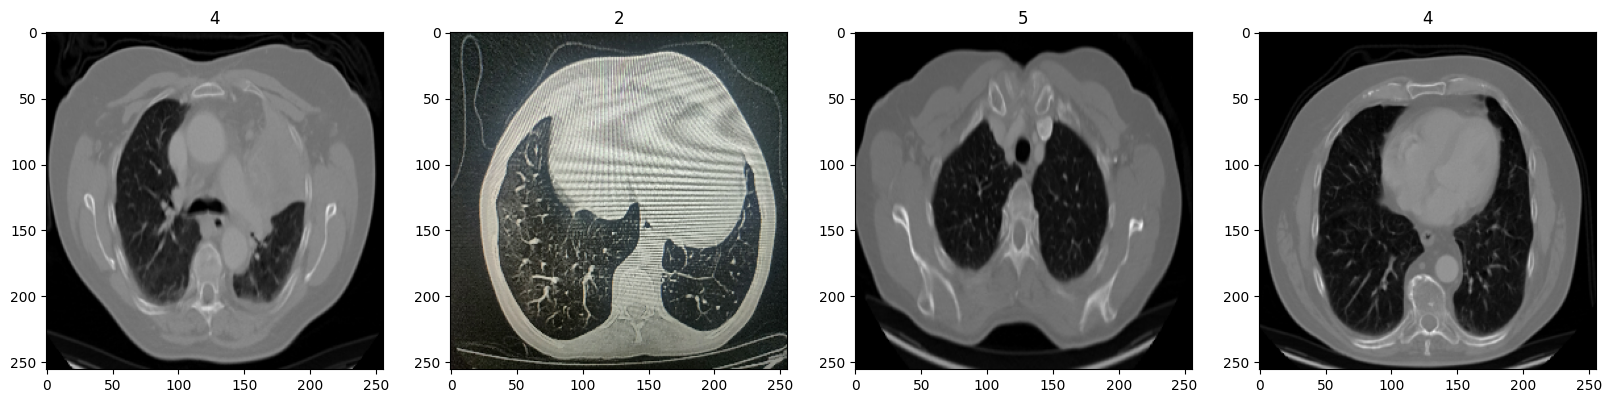

In [286]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [287]:
class_names = data.class_names
print("Class Names: ", class_names)
len(class_names)

Class Names:  ['Emphysema and bronchiectasis', 'ILD', 'Old TB', 'active pulmonary tuberculosis', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'old  pulmonary tuberculosis, with post infective bronchiectasis', 'old  pulmonary tuberculosis, with post tubercular bronchiectasis', 'pneumonia and bronchiectasis', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


11

**Preprocessing**

In [288]:
scaled=batch[0]/255

In [289]:
scaled.max()

1.0

In [290]:
data = data.map(lambda x,y: (x/255.0,y))

In [291]:
len(data)

33

..

..

For multiclass Data Splitting

In [292]:

x = []
y = []
for images, labels in data:
    x.append(images)
    y.append(labels)

# Convert the lists to numpy arrays
x = tf.concat(x, axis=0)
y = tf.concat(y, axis=0)

# Print the shapes of X and y
print("X shape:", x.shape)
print("y shape:", y.shape)


X shape: (1033, 256, 256, 3)
y shape: (1033,)


In [293]:
x.shape

TensorShape([1033, 256, 256, 3])

In [294]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [295]:
x = x.numpy()
y = y.numpy()

In [296]:
y

array([6, 1, 1, ..., 6, 6, 4])

Encoding


In [297]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=11)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [298]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the sizes of the resulting sets
print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Test set size:", len(x_test))


Training set size: 660
Validation set size: 166
Test set size: 207


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation between -20 and 20 degrees
    width_shift_range=0.1,  # Randomly shift the image horizontally by up to 10% of its width
    height_shift_range=0.1, # Randomly shift the image vertically by up to 10% of its height
    zoom_range=0.2,         # Randomly zoom into the image by up to 20%
    horizontal_flip=True,   # Randomly flip the image horizontally
    rescale=1./255          # Rescale pixel values to [0, 1]
)

train_generator = datagen.flow(x_train, y_train, batch_size=32)


..

..

**Creating the Model**

In [299]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [322]:
model = Sequential()

In [323]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(11, activation='softmax'))


In [324]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [325]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 30, 30, 64)      

Training 

In [304]:
logdir='logs'

In [305]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [326]:
hist = model.fit(x_train, y_train, epochs=9, validation_data=(x_val, y_val))

Epoch 1/9
21/21 [==============================] - 29s 1s/step - loss: 2.2455 - accuracy: 0.2288 - val_loss: 1.7812 - val_accuracy: 0.3193
Epoch 2/9
21/21 [==============================] - 27s 1s/step - loss: 1.2318 - accuracy: 0.5227 - val_loss: 0.8785 - val_accuracy: 0.6506
Epoch 3/9
21/21 [==============================] - 27s 1s/step - loss: 0.6018 - accuracy: 0.7697 - val_loss: 0.5912 - val_accuracy: 0.8373
Epoch 4/9
21/21 [==============================] - 27s 1s/step - loss: 0.2645 - accuracy: 0.9152 - val_loss: 0.7597 - val_accuracy: 0.8072
Epoch 5/9
21/21 [==============================] - 27s 1s/step - loss: 0.2318 - accuracy: 0.9152 - val_loss: 0.6430 - val_accuracy: 0.8373
Epoch 6/9
21/21 [==============================] - 27s 1s/step - loss: 0.1332 - accuracy: 0.9515 - val_loss: 0.5528 - val_accuracy: 0.8614
Epoch 7/9
21/21 [==============================] - 26s 1s/step - loss: 0.1491 - accuracy: 0.9470 - val_loss: 0.4561 - val_accuracy: 0.8795
Epoch 8/9
21/21 [==========

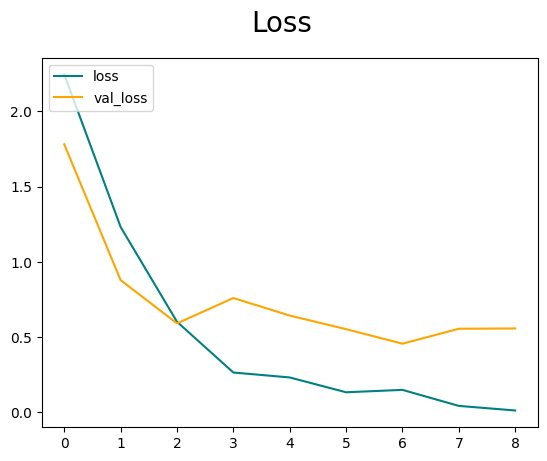

In [327]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label = 'loss')
plt.plot(hist.history['val_loss'], color='orange',label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

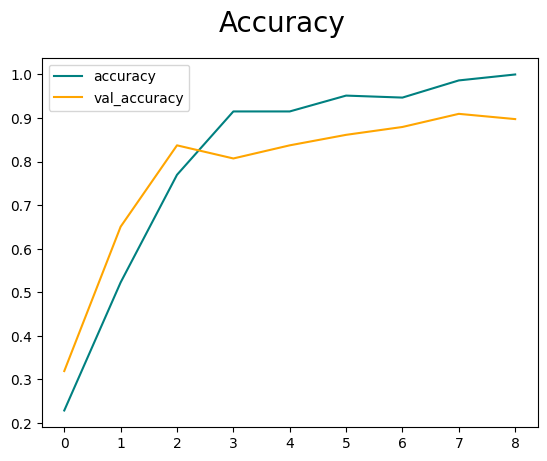

In [328]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [309]:
y_test.shape

(207, 11)

In [329]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

7/7 [==============================] - 2s 254ms/step - loss: 0.4231 - accuracy: 0.8986


**Testing On new data**

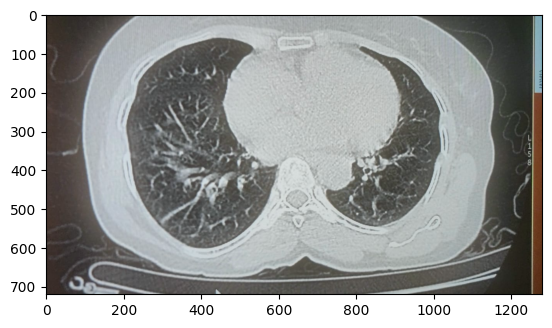

In [311]:
img = cv2.imread('2.jpg')
plt.imshow(img)
plt.show()

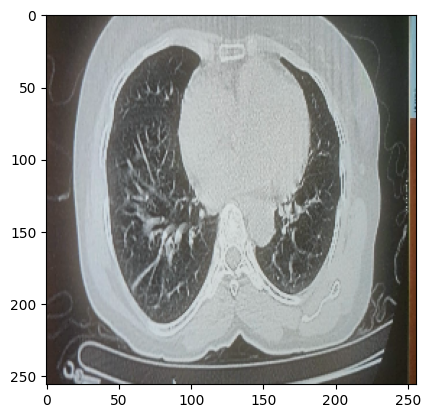

In [312]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

now we send in image as indivitual test other than batches as in training 

In [313]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [314]:
value = model.predict(np.expand_dims(resize/255 , 0))

1/1 [==============================] - 0s 126ms/step


In [315]:
val = value.tolist()
val = max(val)
predicted_index = (val.index(max(val)))

In [316]:
predicted_class = class_names[predicted_index]
predicted_class

'normal'

In [317]:
class_names

['Emphysema and bronchiectasis',
 'ILD',
 'Old TB',
 'active pulmonary tuberculosis',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'old  pulmonary tuberculosis, with post infective bronchiectasis',
 'old  pulmonary tuberculosis, with post tubercular bronchiectasis',
 'pneumonia and bronchiectasis',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

**Saving**

In [318]:
from tensorflow.keras.models import load_model

In [319]:
model.save(os.path.join('models','covidtestmodel.h5'))